In [46]:
import requests, json
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

In [48]:
url = 'https://nfdirepo.fokus.fraunhofer.de'
ID = 'doi:10.82207/FK2/152X6I/OVLZEE'

In [49]:
root_ID = 'root'
dataset_ID = '46'
version = '2.0'

In [50]:
get_original = requests.get(url+'/api/access/datafile/:persistentId/?persistentId='+ID, params='format=original')
xs_vsTOS = pd.read_excel(get_original.content, sheet_name=4)
xs_vsTOS.tail()

,Clock,Experiment,xCO,xH2,Temperature,Vflow,Pressure,TOS,Reactor,X_CO,X_H2,S_Methane,S_Ethane,S_Propane,S_n-Butane,S_nC5,S_nC6,S_Ethylene,S_Propylene,S_n-Butene,S_C5-1,S_C6-1,S_Methanol,S_Ethanol,S_Propanol,S_Butanol,S_Acetaldehyde,S_Propanal,S_Butanal,S_Acetic acid,S_Methyl acetate,S_Ethyl acetate,S_Unknown,S_CO2,S_C2_oxy,S_C2_p_oxy,S_C2_p_HCs,C-balance
263,"09-07-2020 05:40:46,85",7,0.2,0.6,260,41.7,54,182,5,0.09,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.27,0.0,0.0,0,79.73,20.27,20.27,0.0,99.677146
264,"09-07-2020 09:09:22,85",7,0.2,0.6,260,41.6,54,185,5,0.07,-3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,100.00,0.00,0.00,0.0,100.486628
265,"09-07-2020 12:38:24,85",7,0.2,0.6,260,41.7,54,189,5,0.08,-0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.96,0.0,0.0,0,85.04,14.96,14.96,0.0,100.810152
266,"09-07-2020 16:07:15,85",7,0.2,0.6,260,41.8,54,192,5,0.07,0.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,100.00,0.00,0.00,0.0,100.393517
267,"09-07-2020 19:36:13,85",7,0.2,0.6,260,41.8,54,196,5,0.07,2.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,100.00,0.00,0.00,0.0,98.998821


In [51]:
X = xs_vsTOS.iloc[:,11:-2]
clusters = xs_vsTOS['Reactor']
X.head()

,S_Methane,S_Ethane,S_Propane,S_n-Butane,S_nC5,S_nC6,S_Ethylene,S_Propylene,S_n-Butene,S_C5-1,S_C6-1,S_Methanol,S_Ethanol,S_Propanol,S_Butanol,S_Acetaldehyde,S_Propanal,S_Butanal,S_Acetic acid,S_Methyl acetate,S_Ethyl acetate,S_Unknown,S_CO2,S_C2_oxy,S_C2_p_oxy
0,59.56,4.97,6.46,2.02,0.81,0.37,0.0,0.88,0.15,0,0,0.0,2.88,0.18,0.09,7.54,0.71,0.65,11.63,0.22,0.55,0,0.34,22.05,22.82
1,57.86,4.74,5.92,1.84,0.76,0.34,0.0,1.10,0.15,0,0,0.0,3.32,0.22,0.00,8.11,0.71,0.62,12.90,0.30,0.63,0,0.49,24.33,25.26
2,56.43,4.61,5.60,1.73,0.73,0.34,0.0,0.98,0.14,0,0,0.0,3.64,0.24,0.00,8.52,0.71,0.60,14.08,0.37,0.69,0,0.58,26.24,27.30
3,55.75,4.49,5.36,1.66,0.71,0.26,0.0,1.02,0.15,0,0,0.0,3.86,0.26,0.00,8.78,0.70,0.58,14.61,0.41,0.77,0,0.64,27.25,28.43
4,55.00,4.43,5.23,1.61,0.69,0.29,0.0,1.20,0.15,0,0,0.0,4.08,0.27,0.00,9.06,0.69,0.57,14.81,0.46,0.78,0,0.69,27.95,29.19


In [52]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

np.random.seed(42)

In [53]:
pca = PCA(n_components=2).fit_transform(X)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X)

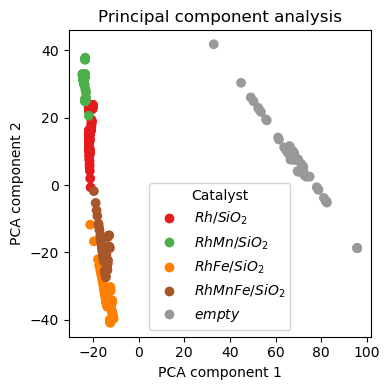

In [54]:
title = 'Catalyst'
labels = [r'$Rh/SiO_2$',r'$RhMn/SiO_2$',r'$RhFe/SiO_2$',r'$RhMnFe/SiO_2$',r'$empty$']

fig, ax = plt.subplots(figsize=(4,4))
plt.title('Principal component analysis')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
scatterplot = ax.scatter(pca[:,0], pca[:,1], c=clusters, cmap=cm.Set1)
ax.legend(handles=scatterplot.legend_elements()[0],labels=labels, title=title)
plt.tight_layout()
plt.savefig('BasCat_PCA.png');

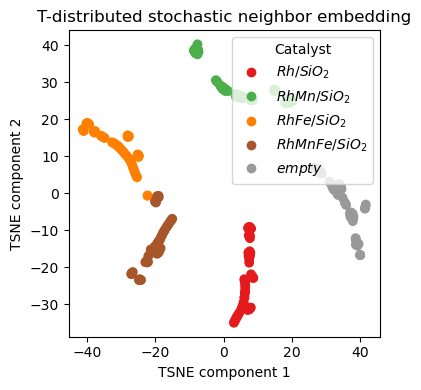

In [55]:
title = 'Catalyst'
labels = [r'$Rh/SiO_2$',r'$RhMn/SiO_2$',r'$RhFe/SiO_2$',r'$RhMnFe/SiO_2$',r'$empty$']

fig, ax = plt.subplots(figsize=(4,4))
plt.title('T-distributed stochastic neighbor embedding')
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
scatterplot = ax.scatter(tsne[:,0], tsne[:,1], c=clusters, cmap=cm.Set1)
ax.legend(handles=scatterplot.legend_elements()[0],labels=labels, title=title)
plt.tight_layout()
plt.savefig('BasCat_TSNE.png');

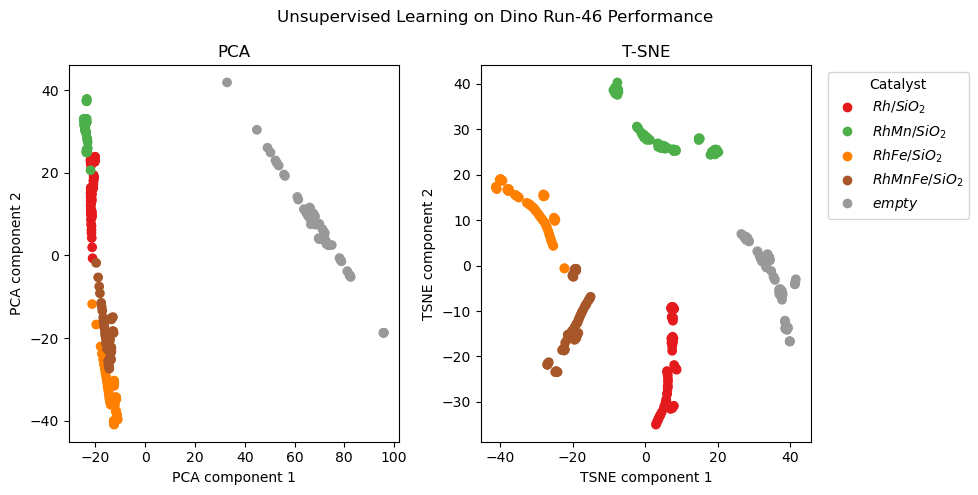

In [56]:
title = 'Catalyst'
labels = [r'$Rh/SiO_2$',r'$RhMn/SiO_2$',r'$RhFe/SiO_2$',r'$RhMnFe/SiO_2$',r'$empty$']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Unsupervised Learning on Dino Run-46 Performance')

ax1.set_title('PCA')
ax1.set_xlabel('PCA component 1')
ax1.set_ylabel('PCA component 2')
scatterplot1 = ax1.scatter(pca[:,0], pca[:,1], c=clusters, cmap=cm.Set1)

ax2.set_title('T-SNE')
ax2.set_xlabel('TSNE component 1')
ax2.set_ylabel('TSNE component 2')
scatterplot2 = ax2.scatter(tsne[:,0], tsne[:,1], c=clusters, cmap=cm.Set1)

ax2.legend(handles=scatterplot2.legend_elements()[0],labels=labels, title=title, bbox_to_anchor=(1.5, 1.0))

plt.tight_layout()
plt.savefig('BasCat_Unsupervised_01.png');

In [57]:
xs_vsTOS_filtered = xs_vsTOS[xs_vsTOS['Reactor']!=5]
xs_vsTOS_filtered.head()

,Clock,Experiment,xCO,xH2,Temperature,Vflow,Pressure,TOS,Reactor,X_CO,X_H2,S_Methane,S_Ethane,S_Propane,S_n-Butane,S_nC5,S_nC6,S_Ethylene,S_Propylene,S_n-Butene,S_C5-1,S_C6-1,S_Methanol,S_Ethanol,S_Propanol,S_Butanol,S_Acetaldehyde,S_Propanal,S_Butanal,S_Acetic acid,S_Methyl acetate,S_Ethyl acetate,S_Unknown,S_CO2,S_C2_oxy,S_C2_p_oxy,S_C2_p_HCs,C-balance
0,"01-07-2020 20:11:45,85",1,0.2,0.6,260,41.7,54,4,1,12.80,25.60,59.56,4.97,6.46,2.02,0.81,0.37,0.0,0.88,0.15,0,0,0.0,2.88,0.18,0.09,7.54,0.71,0.65,11.63,0.22,0.55,0,0.34,22.05,22.82,15.66,94.821057
1,"01-07-2020 23:40:47,85",1,0.2,0.6,260,41.7,54,8,1,10.34,29.08,57.86,4.74,5.92,1.84,0.76,0.34,0.0,1.10,0.15,0,0,0.0,3.32,0.22,0.00,8.11,0.71,0.62,12.90,0.30,0.63,0,0.49,24.33,25.26,14.85,93.196889
2,"02-07-2020 03:09:42,85",1,0.2,0.6,260,41.7,54,11,1,9.42,23.78,56.43,4.61,5.60,1.73,0.73,0.34,0.0,0.98,0.14,0,0,0.0,3.64,0.24,0.00,8.52,0.71,0.60,14.08,0.37,0.69,0,0.58,26.24,27.30,14.13,96.114929
3,"02-07-2020 06:38:32,85",1,0.2,0.6,260,41.7,54,15,1,8.39,27.11,55.75,4.49,5.36,1.66,0.71,0.26,0.0,1.02,0.15,0,0,0.0,3.86,0.26,0.00,8.78,0.70,0.58,14.61,0.41,0.77,0,0.64,27.25,28.43,13.65,93.683447
4,"02-07-2020 10:07:29,85",1,0.2,0.6,260,41.7,54,18,1,8.10,19.38,55.00,4.43,5.23,1.61,0.69,0.29,0.0,1.20,0.15,0,0,0.0,4.08,0.27,0.00,9.06,0.69,0.57,14.81,0.46,0.78,0,0.69,27.95,29.19,13.60,97.105808


In [58]:
X_filtered = xs_vsTOS_filtered.iloc[:,11:-2]
clusters = xs_vsTOS_filtered['Reactor']
X_filtered.head()

,S_Methane,S_Ethane,S_Propane,S_n-Butane,S_nC5,S_nC6,S_Ethylene,S_Propylene,S_n-Butene,S_C5-1,S_C6-1,S_Methanol,S_Ethanol,S_Propanol,S_Butanol,S_Acetaldehyde,S_Propanal,S_Butanal,S_Acetic acid,S_Methyl acetate,S_Ethyl acetate,S_Unknown,S_CO2,S_C2_oxy,S_C2_p_oxy
0,59.56,4.97,6.46,2.02,0.81,0.37,0.0,0.88,0.15,0,0,0.0,2.88,0.18,0.09,7.54,0.71,0.65,11.63,0.22,0.55,0,0.34,22.05,22.82
1,57.86,4.74,5.92,1.84,0.76,0.34,0.0,1.10,0.15,0,0,0.0,3.32,0.22,0.00,8.11,0.71,0.62,12.90,0.30,0.63,0,0.49,24.33,25.26
2,56.43,4.61,5.60,1.73,0.73,0.34,0.0,0.98,0.14,0,0,0.0,3.64,0.24,0.00,8.52,0.71,0.60,14.08,0.37,0.69,0,0.58,26.24,27.30
3,55.75,4.49,5.36,1.66,0.71,0.26,0.0,1.02,0.15,0,0,0.0,3.86,0.26,0.00,8.78,0.70,0.58,14.61,0.41,0.77,0,0.64,27.25,28.43
4,55.00,4.43,5.23,1.61,0.69,0.29,0.0,1.20,0.15,0,0,0.0,4.08,0.27,0.00,9.06,0.69,0.57,14.81,0.46,0.78,0,0.69,27.95,29.19


In [59]:
pca = PCA(n_components=2).fit_transform(X_filtered)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X_filtered)

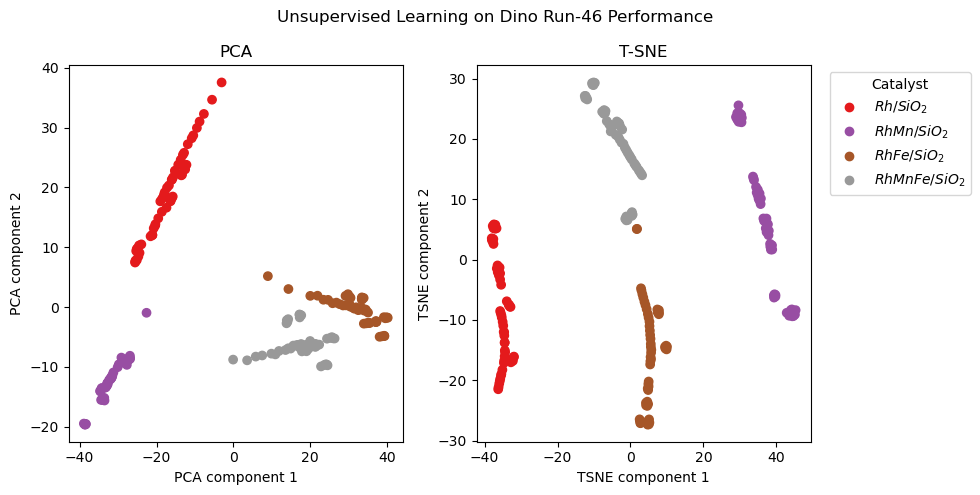

In [60]:
title = 'Catalyst'
labels = [r'$Rh/SiO_2$',r'$RhMn/SiO_2$',r'$RhFe/SiO_2$',r'$RhMnFe/SiO_2$']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Unsupervised Learning on Dino Run-46 Performance')

ax1.set_title('PCA')
ax1.set_xlabel('PCA component 1')
ax1.set_ylabel('PCA component 2')
scatterplot1 = ax1.scatter(pca[:,0], pca[:,1], c=clusters, cmap=cm.Set1)

ax2.set_title('T-SNE')
ax2.set_xlabel('TSNE component 1')
ax2.set_ylabel('TSNE component 2')
scatterplot2 = ax2.scatter(tsne[:,0], tsne[:,1], c=clusters, cmap=cm.Set1)

ax2.legend(handles=scatterplot2.legend_elements()[0],labels=labels, title=title, bbox_to_anchor=(1.5, 1.0))

plt.tight_layout()
plt.savefig('BasCat_Unsupervised_02.png');

In [61]:
cataDict = {
    1:'2.12,0,0',
    2:'2.52,1.54,0',
    3:'2.52,0,1.48',
    4:'2.46,1.46,1.46'
}

In [62]:
X = xs_vsTOS_filtered.iloc[:,2:11]
X = X.replace({'Reactor':cataDict})

In [63]:
X[['Rh', 'Mn', 'Fe']] = X['Reactor'].str.split(pat=',', expand=True)
X = X.drop(['Reactor'], axis=1)

In [64]:
X[['Rh', 'Mn', 'Fe']] = X[['Rh', 'Mn', 'Fe']].astype('float')

X['S_Ethanol'] = xs_vsTOS_filtered['S_Ethanol']
X.dtypes

xCO            float64
xH2            float64
Temperature      int64
Vflow          float64
Pressure         int64
TOS              int64
X_CO           float64
X_H2           float64
Rh             float64
Mn             float64
Fe             float64
S_Ethanol      float64
dtype: object

In [65]:
X.head()

,xCO,xH2,Temperature,Vflow,Pressure,TOS,X_CO,X_H2,Rh,Mn,Fe,S_Ethanol
0,0.2,0.6,260,41.7,54,4,12.80,25.60,2.12,0.0,0.0,2.88
1,0.2,0.6,260,41.7,54,8,10.34,29.08,2.12,0.0,0.0,3.32
2,0.2,0.6,260,41.7,54,11,9.42,23.78,2.12,0.0,0.0,3.64
3,0.2,0.6,260,41.7,54,15,8.39,27.11,2.12,0.0,0.0,3.86
4,0.2,0.6,260,41.7,54,18,8.10,19.38,2.12,0.0,0.0,4.08


In [66]:
import seaborn as sns

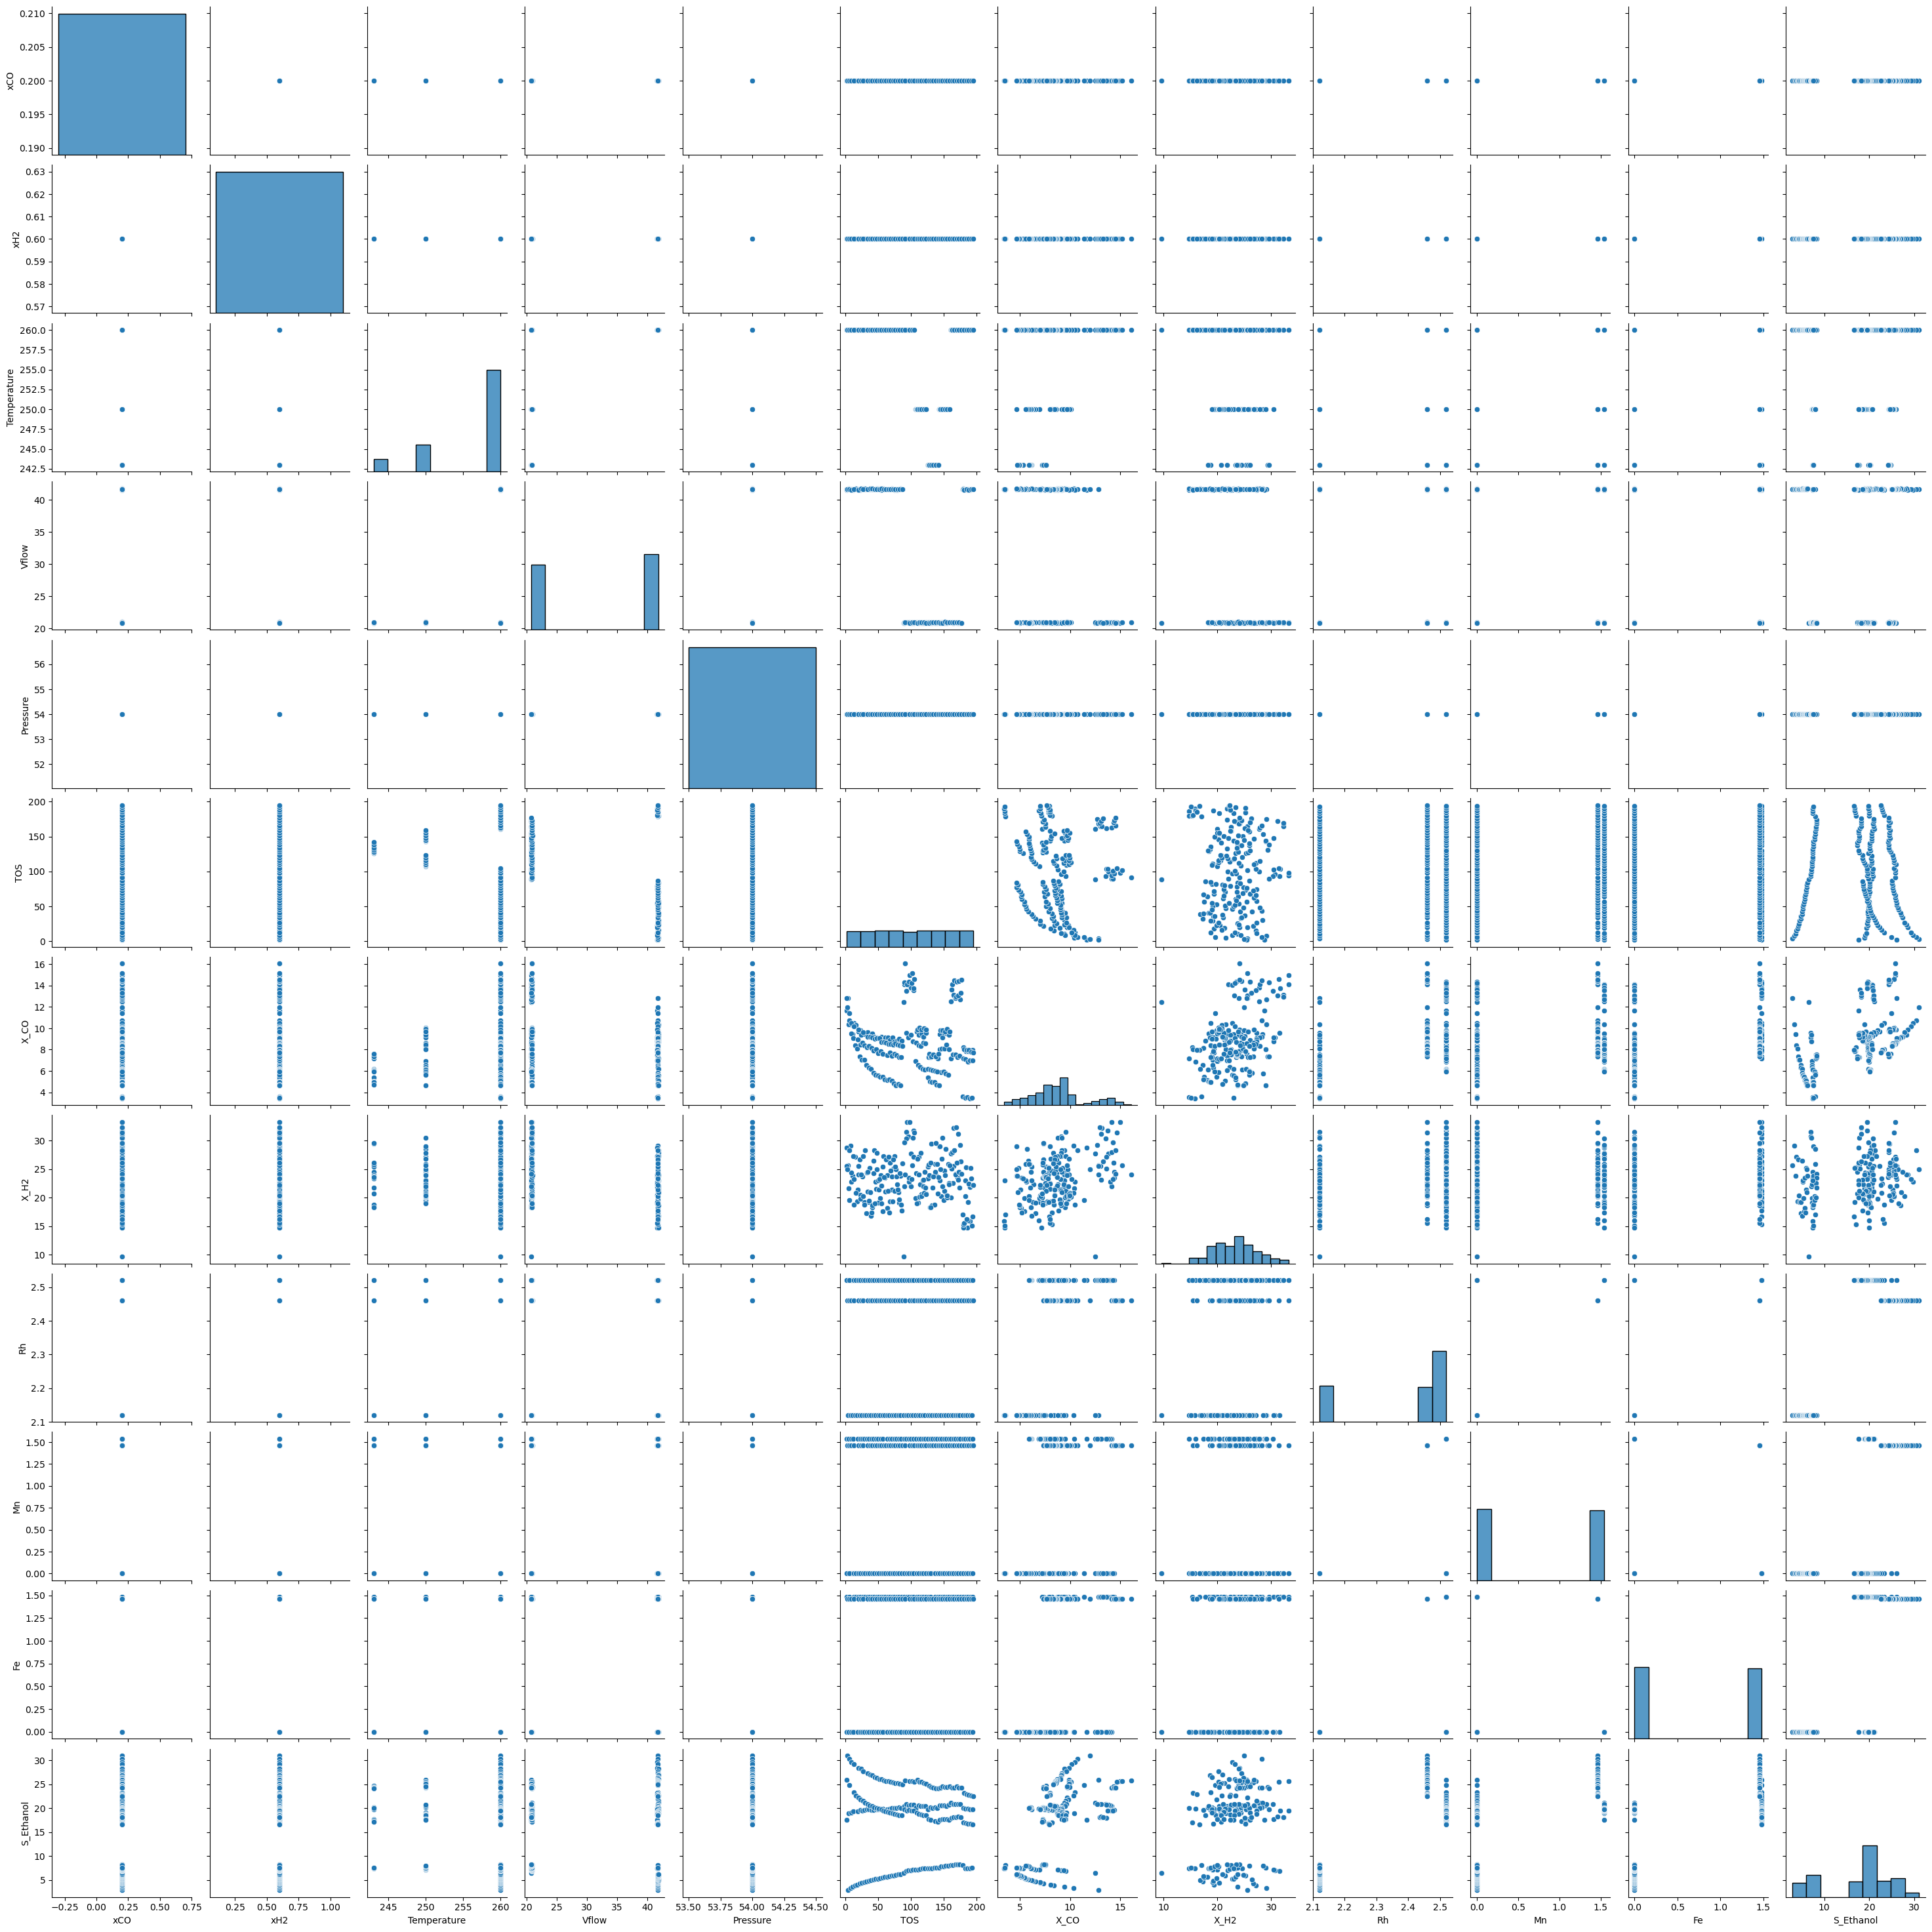

In [67]:
sns.pairplot(X)

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
X.iloc[:,0:-1].head()

,xCO,xH2,Temperature,Vflow,Pressure,TOS,X_CO,X_H2,Rh,Mn,Fe
0,0.2,0.6,260,41.7,54,4,12.80,25.60,2.12,0.0,0.0
1,0.2,0.6,260,41.7,54,8,10.34,29.08,2.12,0.0,0.0
2,0.2,0.6,260,41.7,54,11,9.42,23.78,2.12,0.0,0.0
3,0.2,0.6,260,41.7,54,15,8.39,27.11,2.12,0.0,0.0
4,0.2,0.6,260,41.7,54,18,8.10,19.38,2.12,0.0,0.0


In [70]:
forest = RandomForestRegressor()
forest.fit(X.iloc[:,0:-1], X.iloc[:,-1])

RandomForestRegressor()

In [71]:
names = X.iloc[:,0:-1].columns

In [72]:
importances = forest.feature_importances_

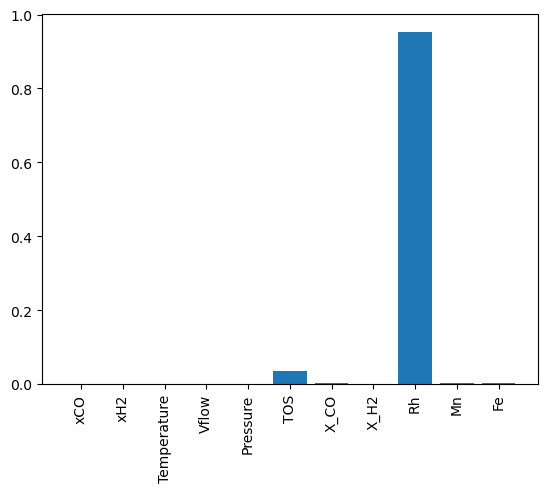

In [73]:
plt.xticks(rotation = 90)
plt.bar(x=names, height=importances);

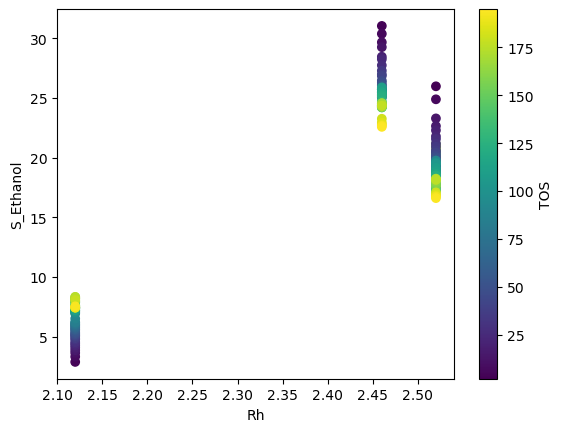

In [74]:
plt.xlabel('Rh')
plt.ylabel('S_Ethanol')
plt.scatter(X['Rh'], X['S_Ethanol'], c=X['TOS'])
plt.colorbar(label='TOS');

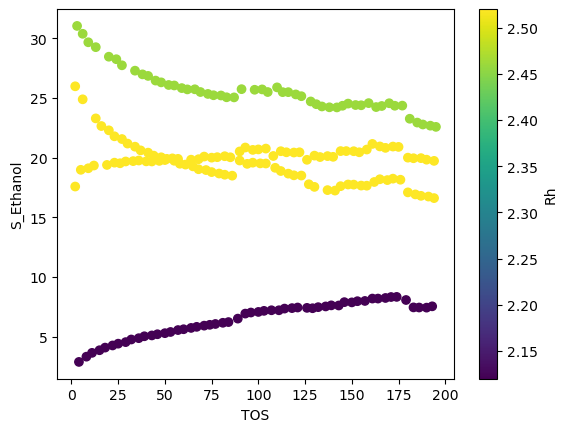

In [75]:
plt.xlabel('TOS')
plt.ylabel('S_Ethanol')
plt.scatter(X['TOS'], X['S_Ethanol'], c=X['Rh'])
plt.colorbar(label='Rh');

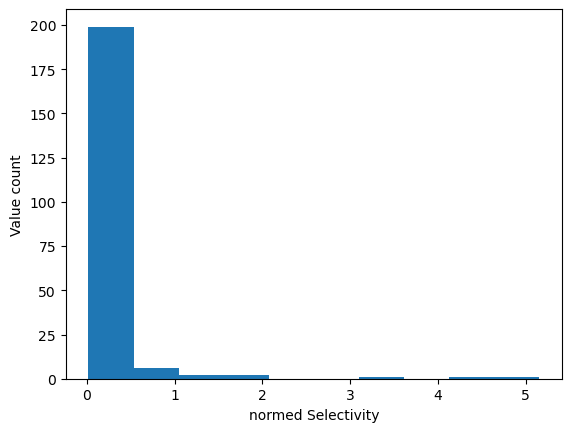

In [76]:
plt.xlabel('normed Selectivity')
plt.ylabel('Value count')
plt.hist(X['S_Ethanol']/(X['TOS']*X['Rh']));

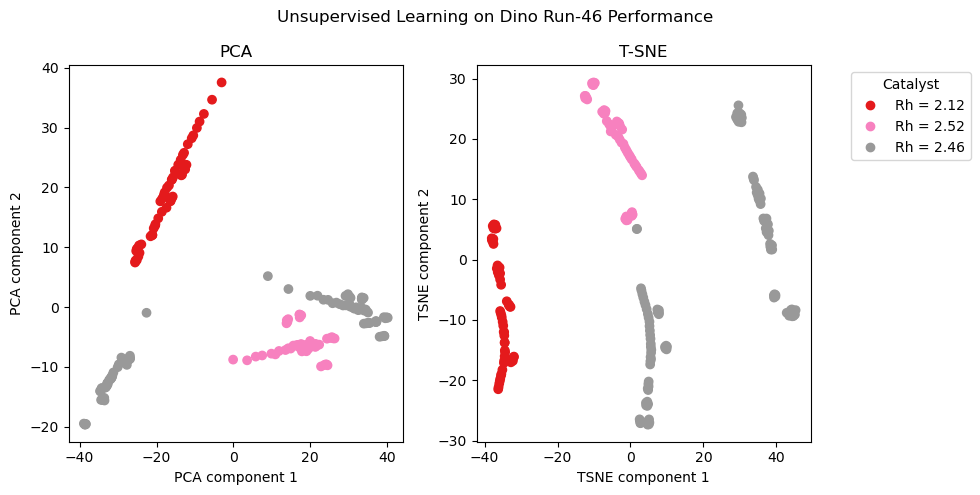

In [77]:
title = 'Catalyst'
labels = ['Rh = 2.12', 'Rh = 2.52', 'Rh = 2.46']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Unsupervised Learning on Dino Run-46 Performance')

ax1.set_title('PCA')
ax1.set_xlabel('PCA component 1')
ax1.set_ylabel('PCA component 2')
scatterplot1 = ax1.scatter(pca[:,0], pca[:,1], c=X['Rh'], cmap=cm.Set1)

ax2.set_title('T-SNE')
ax2.set_xlabel('TSNE component 1')
ax2.set_ylabel('TSNE component 2')
scatterplot2 = ax2.scatter(tsne[:,0], tsne[:,1], c=X['Rh'], cmap=cm.Set1)

ax2.legend(handles=scatterplot2.legend_elements()[0],labels=labels, title=title, bbox_to_anchor=(1.5, 1.0))

plt.tight_layout()
plt.savefig('BasCat_Unsupervised_03.png');

In [78]:
from sklearn.cluster import KMeans

In [79]:
k_ellbow = []
for E in range(20):
    E = E+1
    kmeans = KMeans(n_clusters=E, n_init='auto')
    kmeans.fit(X.iloc[:,0:-1])
    score = kmeans.score(X.iloc[:,0:-1])
    k_ellbow.append(score)

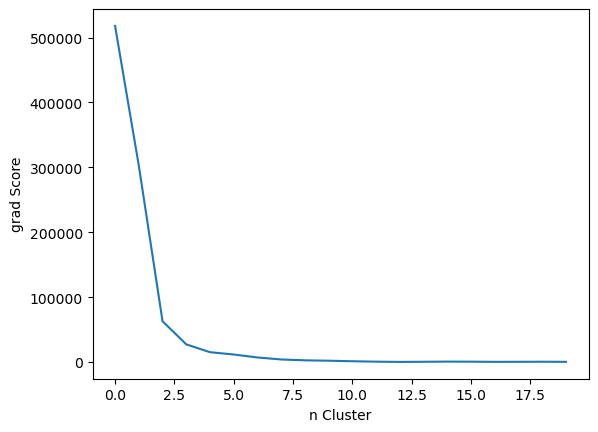

In [80]:
plt.plot(np.gradient(k_ellbow))
plt.xlabel('n Cluster')
plt.ylabel('grad Score');

In [81]:
k_cluster = KMeans(n_clusters=3, n_init='auto')
k_cluster.fit(X.iloc[:,0:-1])
y_k_cluster = k_cluster.predict(X.iloc[:,0:-1])

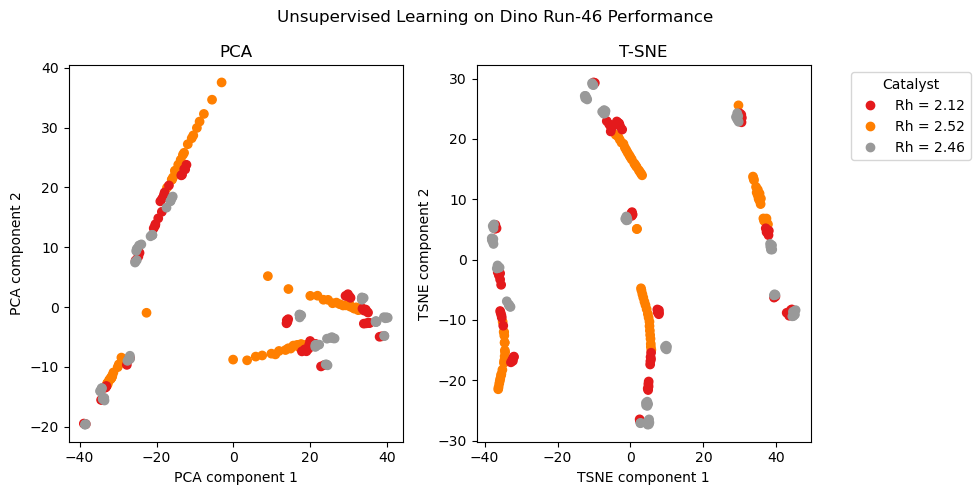

In [82]:
title = 'Catalyst'
labels = ['Rh = 2.12', 'Rh = 2.52', 'Rh = 2.46']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Unsupervised Learning on Dino Run-46 Performance')

ax1.set_title('PCA')
ax1.set_xlabel('PCA component 1')
ax1.set_ylabel('PCA component 2')
scatterplot1 = ax1.scatter(pca[:,0], pca[:,1], c=y_k_cluster, cmap=cm.Set1)

ax2.set_title('T-SNE')
ax2.set_xlabel('TSNE component 1')
ax2.set_ylabel('TSNE component 2')
scatterplot2 = ax2.scatter(tsne[:,0], tsne[:,1], c=y_k_cluster, cmap=cm.Set1)

ax2.legend(handles=scatterplot2.legend_elements()[0],labels=labels, title=title, bbox_to_anchor=(1.5, 1.0))

plt.tight_layout()
plt.savefig('BasCat_Unsupervised_04.png');